In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


PntoX = 150
PntoY = 20
Longitud = 300
altura_parabola = 10
tramo = 15
tramos = Longitud/tramo

if (Longitud) % tramo == 0:
    print('Valores compatibles de Longitud y tramo')
else:
    print('¡¡Error, valores de Longitud y tramo no divisibles!!')
    


a = PntoY/(PntoX**2)
x = np.arange(-Longitud/2, (Longitud/2) +1)
y = (a*(x**2)) + altura_parabola

X = []
Y = []
valx = x[0]
for i in range(int(tramos)+1):
    X.append(valx)
    valx+=tramo

Y = []
for valor in X:
    Y.append(a * (valor**2) + altura_parabola)


Valores compatibles de Longitud y tramo


In [2]:
Y_0 = np.zeros(len(Y))
Yv = np.column_stack((Y_0,Y))

In [3]:
Elementos = np.zeros(((int(tramos)*3)+1,4))
Nodos = np.zeros(((int(tramos)*2)+2,5))

i1 = 0
i2 = 0
i3 = 0

for i in range(len(Elementos)):
    if i < tramos:
        Elementos[i,:] = [X[i1], Y_0[i1], X[i1+1], Y_0[i1]]
        i1+=1
    elif i <=tramos*2 and i >=tramos:
        Elementos[i,:] = [X[i2], Y_0[i2], X[i2], Y[i2]]
        i2+=1
    elif i>tramos*2:
        Elementos[i,:] = [X[i3], Y[i3], X[i3+1], Y[i3+1]]
        i3+=1

f1 = 0
f2 = 0
f3 = 0
for i in range(len(Nodos)):
    if i < tramos+1:
        Nodos[i,:] = [i+1, X[f1], Y_0[f1], f3+1, f3+2]
        f1+=1
        f3+=2
    elif i >= (tramos+1):
        Nodos[i,:] = [i+1, X[f2], Y[f2], f3+1, f3+2]
        f2+=1
        f3+=2

# print(Elementos)
# print(Nodos)

print(f'Hay: {len(Elementos)} Elementos')
print(f'Hay: {len(Nodos)} Nodos')



columna_0_por_fila = []
columna_0_por_fila_2y3 = []

for fila_elem in Elementos:
    found = False
    found_2y3 = False

    for fila_nodo in Nodos:
        if (fila_elem[0] == fila_nodo[1]) and (fila_elem[1] == fila_nodo[2]):
            columna_0_por_fila.append(fila_nodo[0])
            found = True

        if (fila_elem[2] == fila_nodo[1]) and (fila_elem[3] == fila_nodo[2]):
            columna_0_por_fila_2y3.append(fila_nodo[0])
            found_2y3 = True

        if found and found_2y3:
            break  # Si encontramos coincidencia en ambas, salimos del bucle interior

    if not found:
        columna_0_por_fila.append(None)
    if not found_2y3:
        columna_0_por_fila_2y3.append(None)


Hay: 61 Elementos
Hay: 42 Nodos


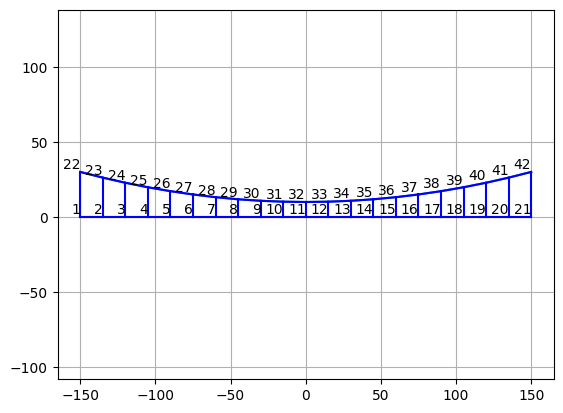

In [4]:
plt.plot(X, Y)
plt.plot(X, Y_0)

for i in range(len(Elementos)):
    plt.plot([Elementos[i, 0], Elementos[i, 2]], [Elementos[i, 1], Elementos[i, 3]], 'b')  # Plot lines

for i in range(len(Nodos)):
    plt.text(Nodos[i, 1], Nodos[i, 2], f'{int(Nodos[i, 0])}', ha='right', va='bottom')

plt.axis('equal')
plt.grid(True)
plt.show()

In [5]:
NElementos = np.column_stack((columna_0_por_fila, columna_0_por_fila_2y3))

Lee = np.zeros((len(Elementos), 4))
for i in range(len(NElementos)):
    for j in range(len(Nodos)):
        if NElementos[i, 0] == Nodos[j, 0]:
            Lee[i,0:2] = Nodos[j,3:5]

        if NElementos[i, 1] == Nodos[j, 0]:
            Lee[i,2:5] = Nodos[j,3:5]

# Crear DataFrame y agregar descripciones
descripciones_filas = ['Elemento ' + str(i + 1) for i in range(len(Lee))]  # Crear descripciones de filas

df = pd.DataFrame(Lee)
df.columns = ['Xa', 'Ya', 'Xb', 'Yb']

# Agregar las descripciones de filas al DataFrame
df_tabla = pd.DataFrame(descripciones_filas, columns=['Descripción']).join(df)
display(df_tabla.style.set_caption('Vectores de ensamble'))

,Descripción,Xa,Ya,Xb,Yb
0,Elemento 1,1.000000,2.000000,3.000000,4.000000
1,Elemento 2,3.000000,4.000000,5.000000,6.000000
2,Elemento 3,5.000000,6.000000,7.000000,8.000000
3,Elemento 4,7.000000,8.000000,9.000000,10.000000
4,Elemento 5,9.000000,10.000000,11.000000,12.000000
5,Elemento 6,11.000000,12.000000,13.000000,14.000000
6,Elemento 7,13.000000,14.000000,15.000000,16.000000
7,Elemento 8,15.000000,16.000000,17.000000,18.000000
8,Elemento 9,17.000000,18.000000,19.000000,20.000000
9,Elemento 10,19.000000,20.000000,21.000000,22.000000
